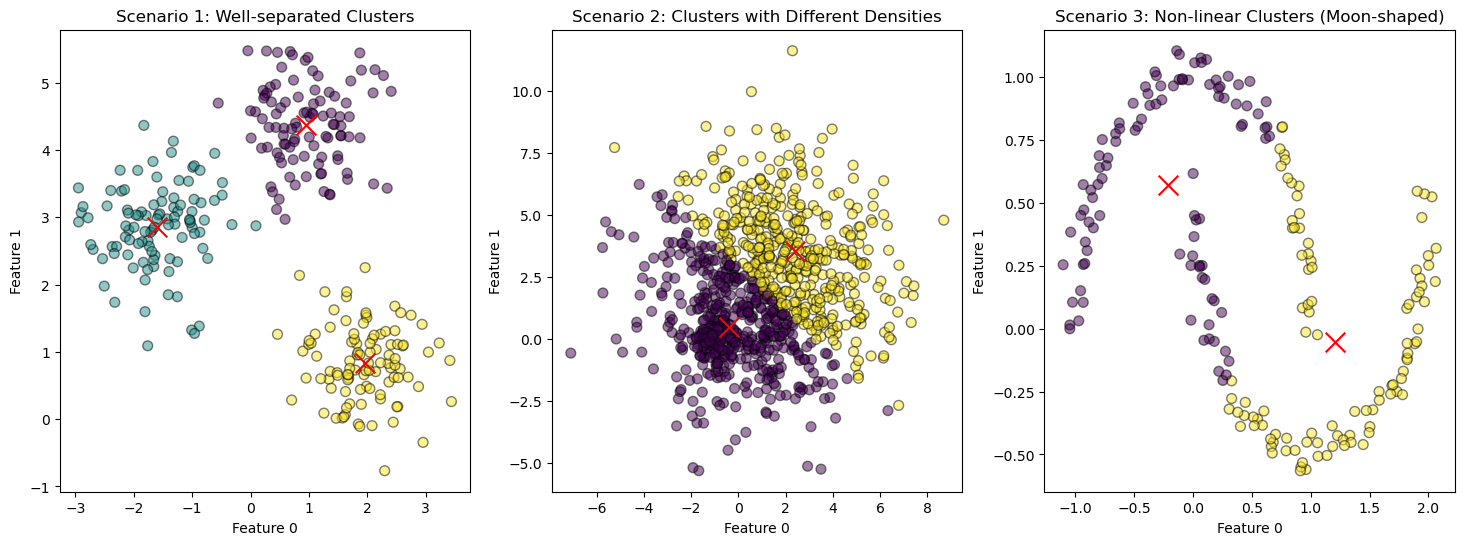

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans

# 데이터 생성
# 시나리오 1: 잘 분리된 동일 밀도 클러스터
X0, y0 = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# 시나리오 2: 다른 밀도의 클러스터
X1, y1 = make_blobs(n_samples=[100, 800], centers=[(-1, 0), (1, 2)], cluster_std=[0.5, 2.5], random_state=42)

# 시나리오 3: 비선형 클러스터 (반달 모양)
X2, y2 = make_moons(n_samples=200, noise=0.05, random_state=42)

# K-means 알고리즘 적용
kmeans0 = KMeans(n_clusters=3, random_state=42).fit(X0)
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(X1)
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(X2)

# 시각화 함수
def plot_clusters(X, y, centroids, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', marker='o', edgecolors='k', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')
    plt.title(title)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")

# 그래프 그리기
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plot_clusters(X0, kmeans0.labels_, kmeans0.cluster_centers_, "Scenario 1: Well-separated Clusters")

plt.subplot(1, 3, 2)
plot_clusters(X1, kmeans1.labels_, kmeans1.cluster_centers_, "Scenario 2: Clusters with Different Densities")

plt.subplot(1, 3, 3)
plot_clusters(X2, kmeans2.labels_, kmeans2.cluster_centers_, "Scenario 3: Non-linear Clusters (Moon-shaped)")
plt.show()

In [2]:
#!pip install yellowbrick

In [3]:
# 필요한 패키지 설치
#pip install yellowbrick
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#샘플 데이터 출력
df=pd.read_csv('data/Mall_Customers.csv')

In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Kmeans
- 성별, 나이, 수입, 소비
- 피처에 대한 이해도 함께 군집분석을 진행하면 좋다.

In [7]:
df_sp=df.drop('CustomerID',axis=1)

In [8]:
# 군집화를 위한 피처를 정리하기
df_sp

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


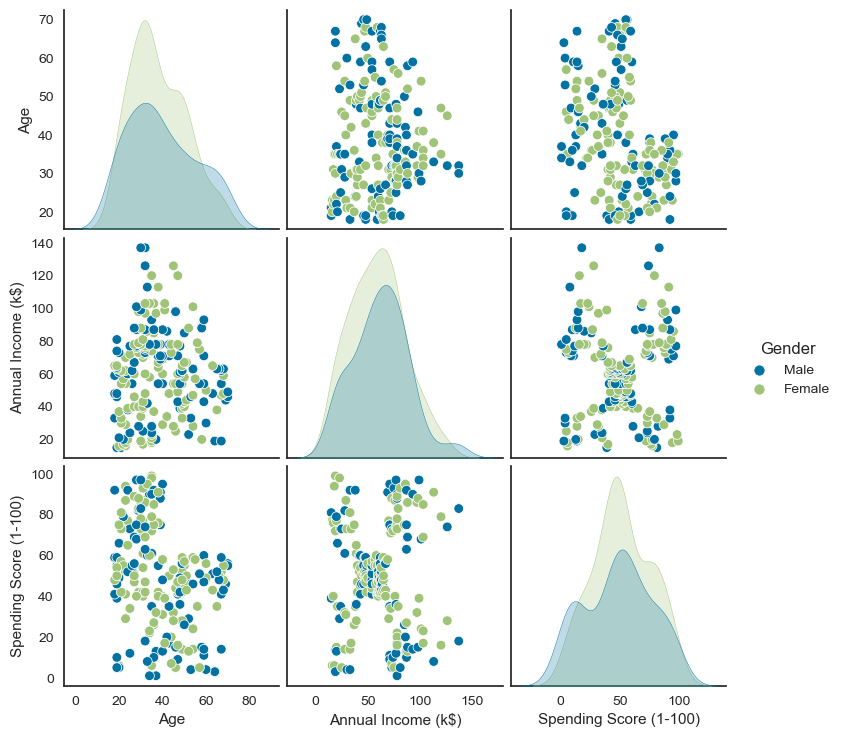

In [9]:
sns.set_style('ticks')
sns.pairplot(df_sp, hue='Gender')
plt.show()

## 군집화
### 스케일링은 필수

In [19]:
#인코딩작업
df_km = pd.get_dummies(df_sp, columns = ['Gender'],drop_first=True)

In [20]:
#스케일링 불러오기
mns = MinMaxScaler()

df_mns = mns.fit_transform(df_km)

In [21]:
# 컬럼 합쳐보기

df_mns_sp = pd.DataFrame(data= df_mns, columns = df_km.columns)

#minmax 스케일링 작업 완료
df_mns_sp

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0
196,0.519231,0.909836,0.275510,0.0
197,0.269231,0.909836,0.744898,1.0
198,0.269231,1.000000,0.173469,1.0


### Kmeans 파라미터

- init : 초기 중심점을 어떤 식으로 둘 것인가?
- n_cluster : 내가 지정할 클러스터 수
- n_init = 몇번 반복할 것인가? 중심점 이동하면서
- random_state : 무작위값 제어하는 시드값
- max_iter : 알고리즘 수렴 전 최대 몇 번 반복할지

In [22]:
kmeans_model1 =KMeans(n_clusters = 3, random_state=111) #고객군의 군집을 3개정도만 나눠보자!

In [23]:
#kmeans 학습은 fit
#스케일링 한 값을 넣는다.
kmeans_model1.fit(df_mns_sp)


KMeans(n_clusters=3, random_state=111)

In [24]:
#kmeans 제공하는 함수들
#inertia_ SSE 값 출력
#cluster_centers_ 중심 좌표
# n_iter_ 반복횟수 출력
print(kmeans_model1.inertia_)
print(kmeans_model1.cluster_centers_)
print(kmeans_model1.n_iter_)
print(kmeans_model1.labels_) #내가 kmeans 군집의 레이블을 확인할 수 있다. 인덱스기준으로 나열된 내용들

30.11037481210345
[[ 2.00742240e-01  3.66120219e-01  6.80451128e-01 -3.33066907e-16]
 [ 4.19361888e-01  3.87108793e-01  4.84809833e-01  1.00000000e+00]
 [ 5.79020979e-01  3.59165425e-01  3.44712430e-01 -2.77555756e-16]]
5
[1 1 2 0 0 0 2 0 1 0 1 0 2 0 1 1 2 1 1 0 1 1 2 1 2 1 2 1 2 0 1 0 1 1 2 0 2
 0 2 0 2 1 1 0 2 0 2 0 0 0 2 1 0 1 2 1 2 1 0 1 1 1 2 2 1 1 2 2 1 0 1 2 2 2
 1 1 2 1 0 2 1 1 1 2 0 1 2 0 0 2 2 1 1 2 0 1 2 0 1 1 0 2 1 1 1 0 2 1 1 1 1
 0 2 1 0 0 2 2 2 2 1 2 0 1 0 0 1 1 1 1 1 1 0 0 1 0 2 1 1 0 2 1 0 0 1 1 1 0
 2 1 1 1 2 0 2 0 1 0 1 0 2 0 1 0 1 0 1 0 2 1 1 1 1 1 2 0 1 1 1 1 2 0 1 0 2
 1 2 1 2 0 2 0 1 0 2 0 2 1 1 1]


## 군집평가

### Elbow

<Axes: >

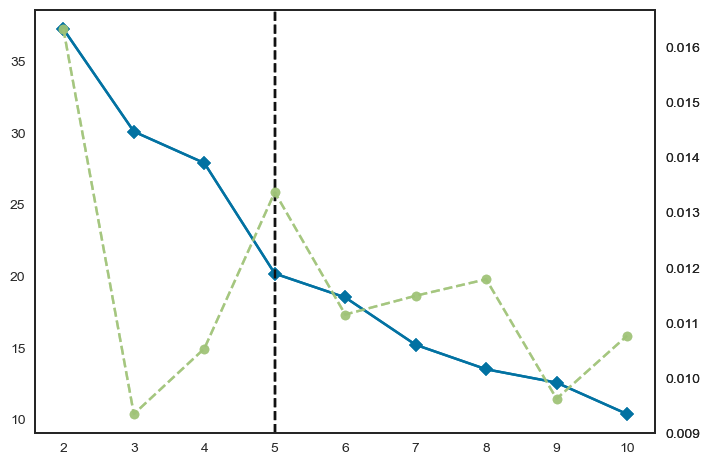

In [16]:
Elbow_ch =KElbowVisualizer(kmeans_model1)
Elbow_ch.fit(df_mns_sp) #데이터 값 그대로 넣기
Elbow_ch.draw() #엘보우 그래프 그리기

### 실루엣계수

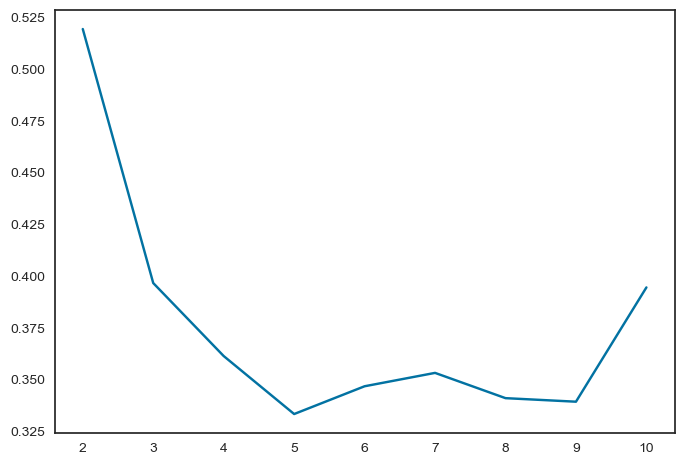

In [17]:
# 반복문을 통해 실루엣 계수가 어떤 식으로 변화하는지 체크하기
KMeans_model1={'random_state':111}

# 실루엣 계수를 추가하기
# 군집의 수가 변화하면서 어떤 식으로 값이 변화하는지를 같이 살펴보는 것

sil_coef = []

# 실루엣계수의 그래프 생성

for i in range(2,11):
    kmeans_sil = KMeans(n_clusters = i, **KMeans_model1)
    kmeans_sil.fit(df_mns_sp) #데이터 학습
    score = silhouette_score(df_mns_sp, kmeans_sil.labels_)
    sil_coef.append(score)

plt.plot(range(2,11), sil_coef)
plt.xticks(range(2,11))
plt.show()

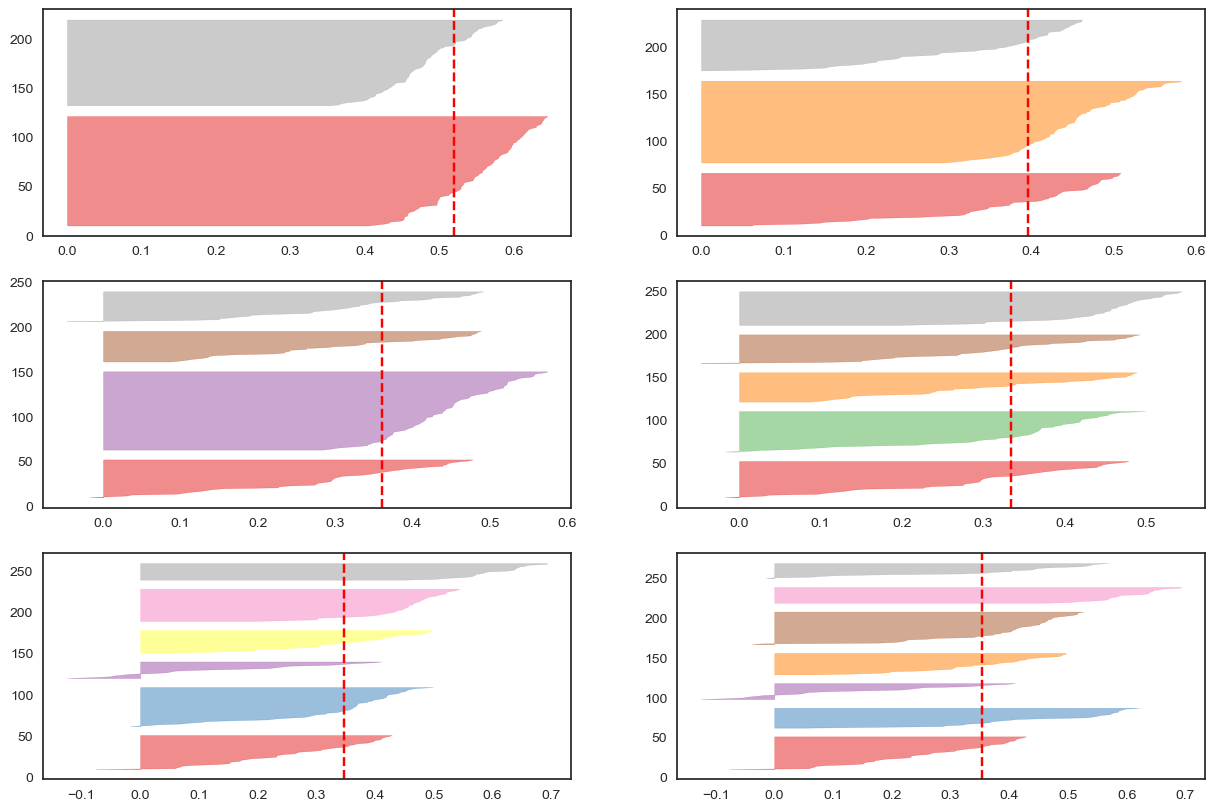

In [18]:
## 군집별로 같이 시각화를 통해 살펴보자!

fig, ax = plt.subplots(3,2 , figsize=(15,10))

for i in [2,3,4,5,6,7]:
    kmeans_model3 = KMeans(
        n_clusters=i,
        random_state=111 )
    q, mod = divmod(i,2)

# 실루엣계수 시각화를 군집별로 진행

    visual = SilhouetteVisualizer(kmeans_model3,
                                 color = 'yellowbricks',
                                 ax=ax[q-1][mod])

    visual.fit(df_mns_sp) #데이터셋 학습

In [25]:
from sklearn.cluster import KMeans

In [27]:
kmeans_model1 = KMeans(n_clusters = 4, random_state = 111)

In [28]:
df['cluster_kn'] = kmeans_model1.fit_predict(df_mns_sp)

In [29]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_kn
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


ValueError: Could not interpret input 'Age_Std'

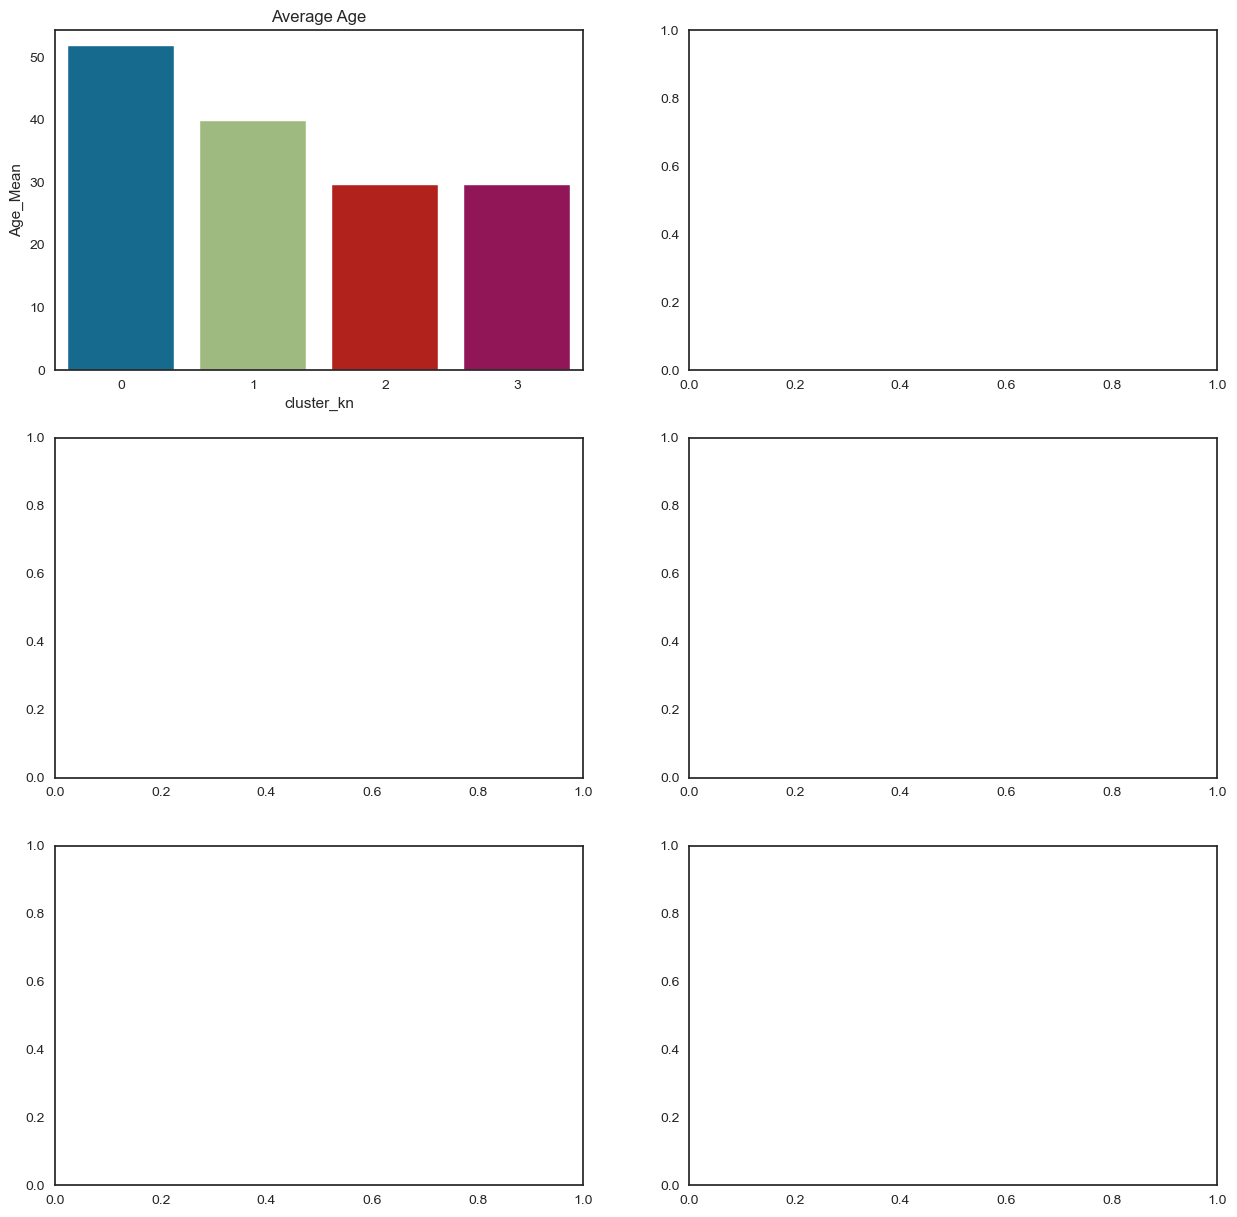

In [58]:

## 클러스터링 된 값들을 groupby
cluster_stats = df.groupby('cluster_kn').agg({
    'Gender':'count',
    'Age':['mean','std'],
    'Annual Income (k$)' : ['mean','std'],
    'Spending Score (1-100)' : ['mean','std']
})

cluster_stats.columns = ['Count','Age_Mean','Age_std','Income_mean','Income_std','Score_mean','Score_std']

# 시각화
fig, axes = plt.subplots(3,2,figsize = (15,15))

#
sns.barplot(x=cluster_stats.index, y = 'Age_Mean', data = cluster_stats, ax = axes[0,0])
axes[0,0].set_title('Average Age')
sns.barplot(x=cluster_stats.index, y = 'Age_Std', data = cluster_stats, ax = axes[0,1])
axes[0,1].set_title('Std Age')
sns.barplot(x=cluster_stats.index, y = 'Income_mean', data = cluster_stats, ax = axes[1,0])
axes[1,0].set_title('Income_mean')
sns.barplot(x=cluster_stats.index, y = 'Income_std', data = cluster_stats, ax = axes[1,1])
axes[1,1].set_title('Income_std')
sns.barplot(x=cluster_stats.index, y = 'Score_mean', data = cluster_stats, ax = axes[2,0])
axes[2,0].set_title('Score_mean')
sns.barplot(x=cluster_stats.index, y = 'Score_std', data = cluster_stats, ax = axes[2,1])
axes[2,1].set_title('Score_std')

plt.show()

In [31]:
cluster_stats

Gender        Age            Annual Income (k$)             \
            count       mean        std               mean        std   
cluster_kn                                                              
0              43  51.697674   7.538899          59.488372  24.341198   
1              88  39.806818  15.514812          62.227273  26.638373   
2              35  29.628571   6.795698          55.342857  21.101914   
3              34  29.617647   5.164064          62.970588  32.132760   

           Spending Score (1-100)             
                             mean        std  
cluster_kn                                    
0                       36.813953  17.068846  
1                       48.511364  27.896770  
2                       40.742857  13.630293  
3                       81.235294   8.893507

# RFM 분석
- RFM 고객 분석하기 위한 피처를 R,F,M 피처를 가지고 고객을 이해하고, 고객을 분석하자라는 분석 방법론
- R : Recency : 고객 중 가장 최근 구매한 상품 구입일과 현재 기준까지의 기간
- F : Frequency : 상품구매횟수, 주문 횟수( 기준에 따라 다르다 )
- M : Monetary : 고객의 총 주문 금액
---
- 기준을 잘 정해야 함
- 도메인에 따라 조금씩 바뀔 수 있다.
- RFM 피처 외에 추가 피처를 더해서 분석할 수 있다.
- 쿠폰에 대한 사용, 고객의 불만율, 고객의 다양한 제품 구매, 고객의 지속기간 등 피처로 추가해서 4개 피처로도 분석이 가능하다


In [36]:
retail_df = pd.read_excel(io = 'data/online_retail_II.xlsx')

In [37]:
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### RFM 피처를 만드는 법

In [38]:
# 취소 상품 고객 제외
retail_sp = retail_df[retail_df['Price'] > 0]
retail_sp = retail_sp[retail_sp['Quantity']>0] # 주문 취소했으니 주문수량도 -인 경우 제외

In [39]:
# 회원인 고객만 분석 가넝
retail_sp = retail_sp[retail_sp['Customer ID'].notnull()]

In [40]:
# 구매 국가도 영국으로만 지정
retail_sp = retail_sp[retail_sp['Country'] == 'United Kingdom']

In [41]:
33retail_sp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


#### M피처 만들기(고객의 총 주문금액)
- Quantity * Price = Monetary

In [43]:
retail_sp['sales_amount'] = retail_sp['Quantity']*retail_sp['Price']

In [44]:
retail_sp['Customer_ID'] = retail_sp['Customer ID'].astype(int)

- 고객 하나 하나의 지표를 수립하는 것
- customer ID별로 groupby를 진행해야 한다

In [48]:
agg_rfm = {
    'InvoiceDate' : 'max', # 주문일자 : 가장 최근
    'Invoice': 'count' ,# 주문 제품 수량
    'sales_amount':'sum'
}

cust_df = retail_sp.groupby('Customer ID').agg(agg_rfm)

In [49]:
cust_df.head()

,InvoiceDate,Invoice,sales_amount
Customer ID,,,
12346.0,2010-06-28 13:53:00,33,372.86
12608.0,2010-10-31 10:49:00,16,415.79
12745.0,2010-08-10 10:14:00,22,723.85
12746.0,2010-06-17 10:41:00,17,254.55
12747.0,2010-12-05 15:38:00,154,5080.53


### R피처

In [50]:
max(retail_sp.InvoiceDate)

Timestamp('2010-12-09 20:01:00')

In [53]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2010,12,9)- cust_df['InvoiceDate']

In [54]:
# timedelta 계산된 값을 x.days + 1로 나눠서 수치형으로 ㅕㄴ환
cust_df['Recency'] = cust_df['Recency'].apply(lambda x:x.days+1)

Customer ID
12346.0    164
12608.0     39
12745.0    121
12746.0    175
12747.0      4
          ... 
18283.0     17
18284.0     66
18285.0    295
18286.0    111
18287.0     17
Name: Recency, Length: 3969, dtype: int64

In [56]:
cust_rfm = cust_df[['Invoice','sales_amount','Recency']]
cust_rfm

,Invoice,sales_amount,Recency
Customer ID,,,
12346.0,33,372.86,163 days 10:07:00
12608.0,16,415.79,38 days 13:11:00
12745.0,22,723.85,120 days 13:46:00
12746.0,17,254.55,174 days 13:19:00
12747.0,154,5080.53,3 days 08:22:00
...,...,...,...
18283.0,230,641.77,16 days 08:30:00
18284.0,28,461.68,65 days 12:27:00
18285.0,12,427.00,294 days 13:36:00


### 필수과제 1
- **Online_Retail 데이터 RFM 군집분석 진행**
- 1.1 기존 데이터 EDA를 통해 피쳐들 간의 시각화, 통계치 등 분석, 인사이트 정리
    - 원본데이터에 대한 분석
- 1.2. RFM 피처를 만들기 위한 기준을 각자 정해서 기준점 코드로 데이터 전처리
    - e.g. 반품은 제외하거나, 영국 고객만 분석하거나, 비회원은 제외하거나 등등
- 1.3. RFM 피처를 만들어서 실제 통계치로 비교해보기
- 1.4. RFM 피처를 통해 군집화 진행
    - KMeans 
    - 최적의 군집이 몇이고, 그런 근거들을 코드와 시각화를 통해 정리
    
- 1.5. RFM 피처에 군집된 label 원본데이터 붙이기

- 1.6. RFM 피처를 이용하여 붙인 label 로 다른 피처들 분석하기
    - e.g. 이 고객군들의 주문제품들은 무엇인지
    - 시계열 적으로 주문패턴
    - Description 에 대한 추가 분석
    
- 1.7. 해당 데이터셋의 고객군들의 RFM 지표의 기초통계량을 정리하고, 시각화를 통해 군집들의 기초 통계치 ( 군집들의 RFM 지표를 같이 정리 )
    - 전체 RFM 지표의 통계치
    - 우리가 군집한 군집들의 RFM 지표 통계치
    - 통계치는 평균, 중앙값, 표준편차 , 최빈값 등등